<a href="https://colab.research.google.com/github/ImOWJ/AIFFEL_Online_Quest/blob/main/Quest04/Quest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 팀
7조 : 오우진, 강영현, 이슬

# 문제
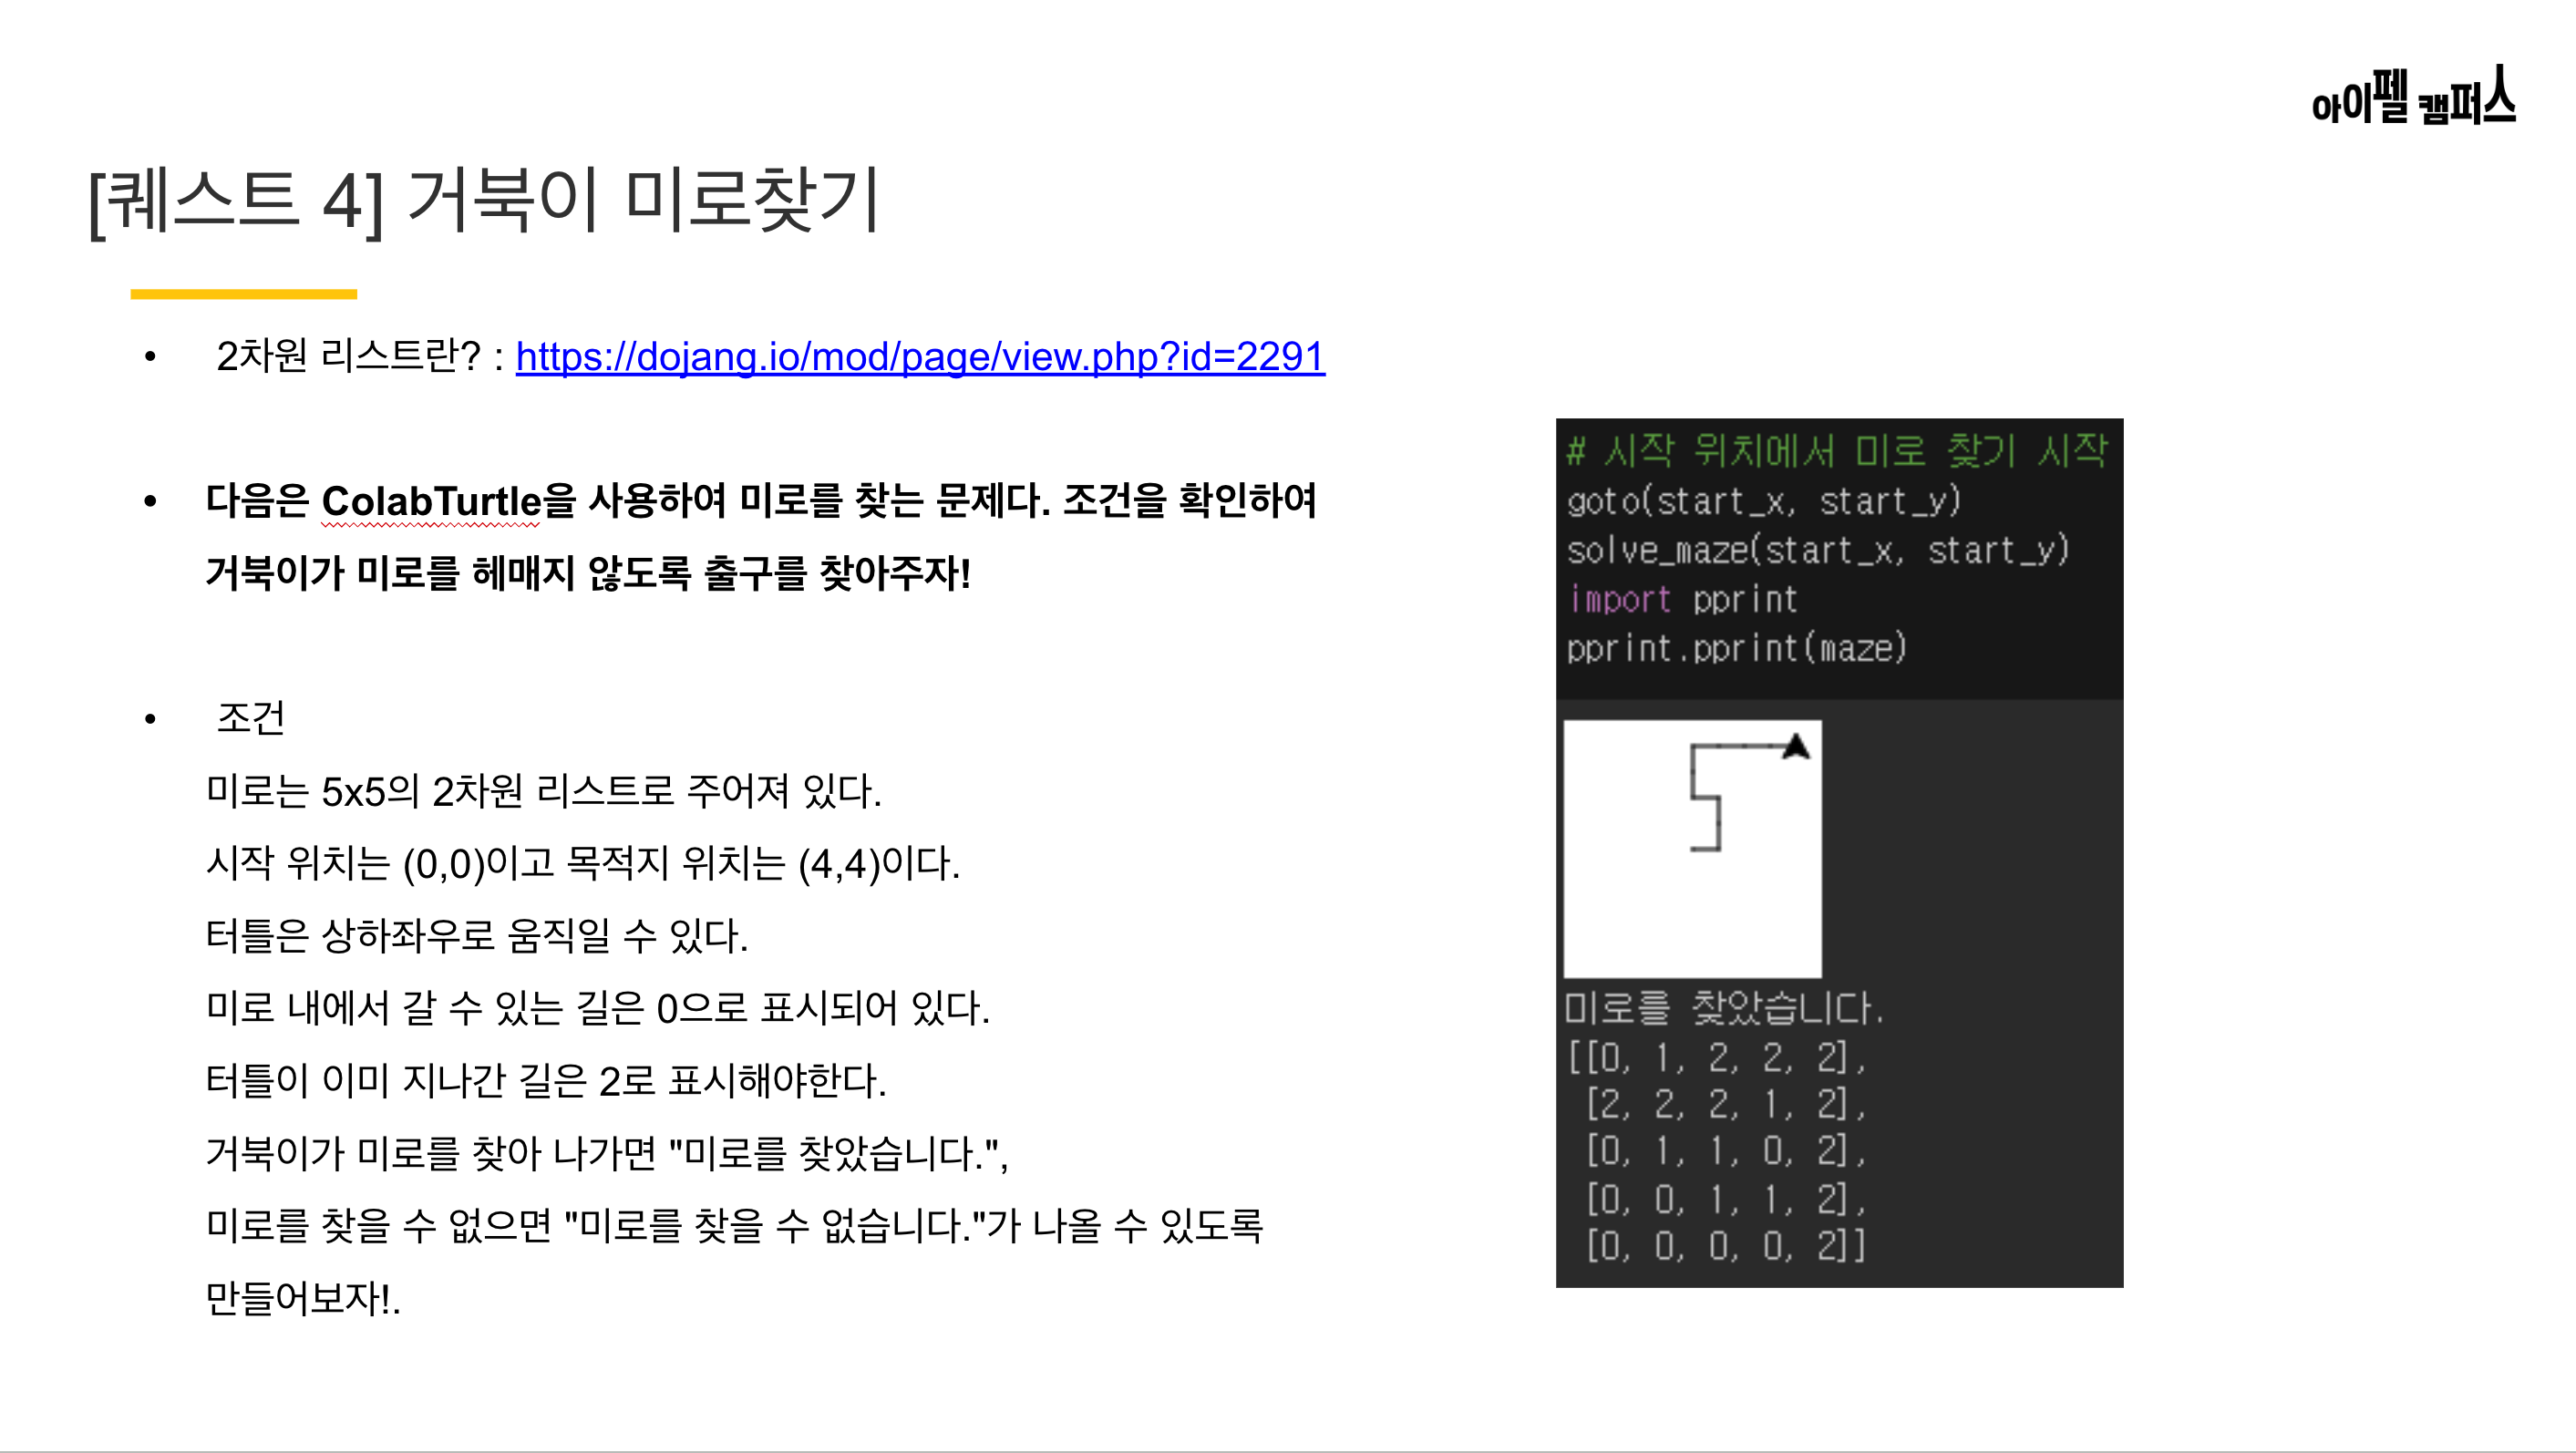




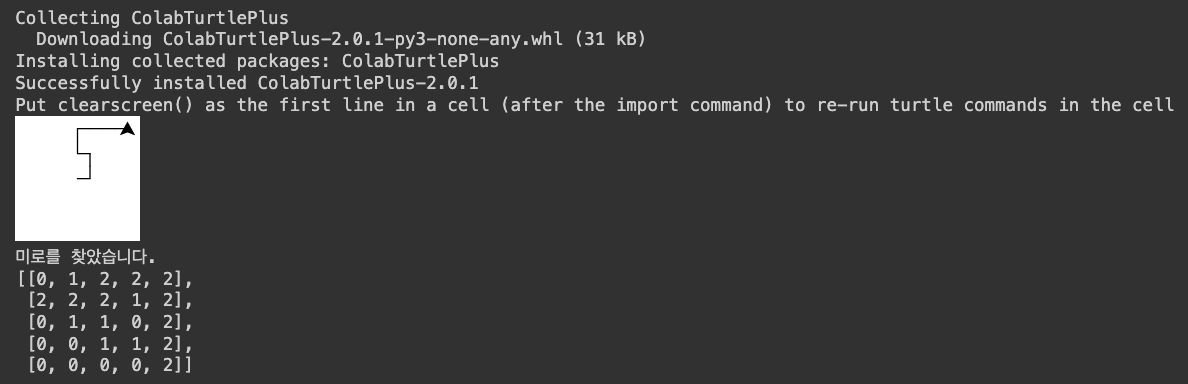

In [ ]:
!pip install ColabTurtlePlus # ColabTurtle 라이브러리 설치
from ColabTurtlePlus.Turtle import * # ColabTurtle 라이브러리에서 Turtle 클래스를 import
from collections import deque


# 미로 데이터
maze = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# 시작 위치와 목적지 위치
start_x, start_y = 0, 0
end_x, end_y = 4, 4

# 터틀 초기 설정
window = (100, 100)
initializeTurtle(window, 'logo')
speed(1)

# 미로 찾기 알고리즘
def solve_maze(x, y):
  # 목적지에 도착한 경우
  if x == end_x and y == end_y:
      # "미로를 찾았습니다" 라는 문장을 출력하고
      print("미로를 찾았습니다")
      # True를 반환한다.
      return True


  # 현재 위치에서 갈 수 있는 방향 탐색
  for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
      nx, ny = x + dx, y + dy
      # 미로 범위(0,0 ~ 4,4) 내에 있고, 갈 수 있는 길인 경우
      #if not (nx >=0 and nx < x and ny >= 0 and ny < y):
      if not(0 <= nx <= 4 and 0 <= ny < 4):
        continue
      ## 미로 범위를 벗어나면 지나간다 : fail
      # if nx < 0 or nx > dx or ny < 0 or ny > dy:
      # if nx < 0 or nx > 4 or ny < 0 or ny > 4:
 ## 벽인경우 무시
      # if maze[nx][ny] == 4:
      # if nx, ny == 4:
      #   continue
##  갈 수 없는 길인 경우
      # 1행에 있을 경우
      if nx == 0 and dy == -1:
        continue
      # 4행에 있을 경우
      if nx == 4 and dy == 1:
        continue
      # 1열에 있을 경우
      if ny == 0 and dx == -1:
        continue
      # 4열에 있을 경우
      if ny == 4 and dx == 1:
        continue

      # 갔던 길 표시
      else:
        maze[nx][ny] = 2

      pendown()
          # 다음 위치로 이동
      goto(nx*10, ny*10)  # 거북이 다음 위치로 이동

      penup()

          # 코드를 해석해주세요!!
      #4,4지점에 갔는지 확인하는 조건문
      if solve_maze(nx, ny):
          return True
      else:

          #return -1
          # 다시 이전으로 돌아가기
          maze[nx][ny] = 0
          solve_maze(nx, ny)
              # 표시된 길 0표시(지우기)
        # maze[nx][ny] = 0

        # 길을 찾지 못한 경우
        # "길을 찾을 수 없습니다"를 출력하고
        # False를 리턴
          print("길을 찾을 수 없습니다.")
          return False

# 시작 위치에서 미로 찾기 시작
goto(start_x, start_y)
solve_maze(start_x, start_y)
import pprint
pprint.pprint(maze)

길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.
길을 찾을 수 없습니다.


KeyboardInterrupt: ignored

# 회고

- 마무리 하지못해 너무 아쉽습니다. 앞으로 더 열심히 해야겠습니다........
- 너무 어렵습니다.. 저는 언제 즈음 코딩을 잘하게 될까요 ㅠㅠ..
- 노드에 있는 내용이 퀘스트에 나온다고 하셨지만 왜 노드에서 아주 잠깐 스쳐갔던 2차원리스트가 주제인 문제로 나온건지 궁금합니다. 퀘스트를 위해 어떻게 공부해야할까...
- 퀘스트 전에 필요한 개념을 리스트로 정리해서


## Keep
- 좌절하지 않고 끝까지 어떤 시도를 해봤다는게 대단하다고 생각합니다.

## Problem
- 2차원 리스트에 대한 개념이 정확하지 않음
- 주석 내용에 맞는 코드를 작성하는 게 쉽지 않았다.(힌트라기보다는 주석 내용을 이해하는 또다른 과제가 되었다.

## Try
- 2차원 리스트를 공부해봐야겠습니다.
- 코랩 터틀 모듈을 한번 공부해보고싶네요.